In [ ]:
# Importing required packages
import numpy as np
import pandas as pd

In [ ]:
# Synthesizing data according to the main part of the example process illustrated in Fig. 2

# defining the conditional probabilities
import numpy as np

P_v = 0.2
P_d1_given_v = np.array([0.2, 0.8])
P_d2_given_v_d1 = np.array([[0.3, 0.8], [0.8, 0.2]])
P_d3_given_v = np.array([0.3, 0.9])

# generate 1000 samples
n_samples = 10000
samples = np.zeros((n_samples, 4))
for i in range(n_samples):
    # sample v
    v = np.random.binomial(1, P_v)
    # sample d1_given_v
    p_d1_given_v = P_d1_given_v[v]
    d1 = np.random.binomial(1, p_d1_given_v)
    # sample d2_given_v_d1
    p_d2_given_v_d1 = P_d2_given_v_d1[v][d1]
    d2 = np.random.binomial(1, p_d2_given_v_d1)


    # sample d3_given_v
    # d3 gets value 2 (meaning null) if d2 is equal to 1
    if d2 == 1:
      d3 = 2
    else:
      p_d3_given_v = P_d3_given_v[v]
      d3 = np.random.binomial(1, p_d3_given_v)
    # store the sample
    samples[i] = [int(v), int(d1), int(d2), int(d3)]

In [ ]:
# Storing into a dataframe

df = pd.DataFrame(samples)
df.columns = ['V', 'D1', 'D2', 'D3']

In [ ]:
df.head()

,V,D1,D2,D3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,2.0
4,0.0,0.0,1.0,2.0


In [ ]:
df['D3'].describe()

count    10000.000000
mean         1.028500
std          0.850858
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: D3, dtype: float64

In [ ]:
# Exporting...
df.to_csv("trainingData.csv", index=False)

In [ ]:
# Let's create a trace log according to the synthesized data table and the process map (Fig. 1)

def trace_creator(row):
    s = 'A'

    if row['D1'] == 0:
      s += 'B'
    else:
      s += 'C'

    if row['D2'] == 0:
      s += 'D'
      if row['D3'] == 0:
        s += 'FG'
      else:
        s += 'H'
      s += 'I'
    else:
      s += 'E'

    return s

df['Trace'] = df.apply(trace_creator, axis=1)

In [ ]:
df.head(20)

,V,D1,D2,D3,Trace
0,0.0,1.0,0.0,0.0,ACDFGI
1,0.0,0.0,1.0,2.0,ABE
2,0.0,1.0,0.0,0.0,ACDFGI
3,1.0,1.0,0.0,1.0,ACDHI
4,0.0,1.0,1.0,2.0,ACE
5,0.0,0.0,1.0,2.0,ABE
6,1.0,1.0,0.0,1.0,ACDHI
7,0.0,0.0,1.0,2.0,ABE
8,0.0,1.0,0.0,0.0,ACDFGI
9,0.0,0.0,1.0,2.0,ABE


In [ ]:
# Creating an event log from the trace log

from datetime import datetime, timedelta

# Create a new DataFrame to store the expanded data
expanded_rows = []

# Iterate through each row of the original DataFrame
for index, row in df.iterrows():
    string_value = row['Trace']
    timestamp = datetime.now() + timedelta(minutes=index)

    # Iterate through each character in the string
    for char in string_value:
        expanded_rows.append({'CaseID': index, 'Activity': char, 'TimeStamp': timestamp})
        timestamp += timedelta(seconds=1)

# Create DataFrame from the list of dictionaries
expanded_df = pd.DataFrame(expanded_rows)

# Display the expanded DataFrame
print(expanded_df.head(10))


   CaseID Activity                  TimeStamp
0       0        A 2024-03-08 21:31:38.459152
1       0        C 2024-03-08 21:31:39.459152
2       0        E 2024-03-08 21:31:40.459152
3       1        A 2024-03-08 21:32:38.459359
4       1        C 2024-03-08 21:32:39.459359
5       1        E 2024-03-08 21:32:40.459359
6       2        A 2024-03-08 21:33:38.459464
7       2        C 2024-03-08 21:33:39.459464
8       2        D 2024-03-08 21:33:40.459464
9       2        H 2024-03-08 21:33:41.459464


In [ ]:
expanded_df.shape

(45949, 3)

In [ ]:
!pip install pm4py

In [ ]:
import pm4py

In [ ]:
dataframe = pm4py.format_dataframe(expanded_df, case_id='CaseID', activity_key='Activity', timestamp_key='TimeStamp')

#  Optional
dataframe.to_csv('exported_log.csv')

event_log = pm4py.convert_to_event_log(dataframe)
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'CaseID': 0, 'Activity': 'A', 'TimeStamp': Timestamp('2024-03-08 21:31:38.459152+0000', tz='UTC'), 'concept:name': 'A', 'time:timestamp': Timestamp('2024-03-08 21:31:38.459152+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'CaseID': 0, 'Activity': 'E', 'TimeStamp': Timestamp('2024-03-08 21:31:40.459152+0000', tz='UTC'), 'concept:name': 'E', 'time:timestamp': Timestamp('2024-03-08 21:31:40.459152+0000', tz='UTC'), '@@index': 2, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'CaseID': 9999, 'Activity': 'A', 'TimeStamp': Timestamp('2024-03-15 20:10:39.001501+0000', tz='UTC'), 'concept:name': 'A', 'time:timestamp': Timestamp('2024-03-15 20:10:39.001501+0000', tz='UTC'), '@@index': 45946, '@@case_index': 9999}, '..', {'CaseID': 9999, 'Activity': 'E', 'TimeStamp': Timestamp('2024-03-15 20:10:41.001501+0000', tz='UTC'), 'concept:name': 'E', 'time:timestamp': Timestamp('2024-03-15 20:10:41.001501

In [ ]:
pm4py.write.write_xes(dataframe, './exported_log_flat')

exporting log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
print(event_log)

[{'attributes': {'concept:name': '0'}, 'events': [{'CaseID': 0, 'Activity': 'A', 'TimeStamp': Timestamp('2024-03-08 20:47:28.222329+0000', tz='UTC'), 'concept:name': 'A', 'time:timestamp': Timestamp('2024-03-08 20:47:28.222329+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'CaseID': 0, 'Activity': 'E', 'TimeStamp': Timestamp('2024-03-08 20:47:30.222329+0000', tz='UTC'), 'concept:name': 'E', 'time:timestamp': Timestamp('2024-03-08 20:47:30.222329+0000', tz='UTC'), '@@index': 2, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'CaseID': 9999, 'Activity': 'A', 'TimeStamp': Timestamp('2024-03-15 19:26:28.742982+0000', tz='UTC'), 'concept:name': 'A', 'time:timestamp': Timestamp('2024-03-15 19:26:28.742982+0000', tz='UTC'), '@@index': 42898, '@@case_index': 9999}, '..', {'CaseID': 9999, 'Activity': 'E', 'TimeStamp': Timestamp('2024-03-15 19:26:30.742982+0000', tz='UTC'), 'concept:name': 'E', 'time:timestamp': Timestamp('2024-03-15 19:26:30.742982

In [ ]:
dataframe.head()

,CaseID,Activity,TimeStamp,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,0,A,2024-03-08 20:47:28.222329+00:00,0,A,2024-03-08 20:47:28.222329+00:00,0,0
1,0,B,2024-03-08 20:47:29.222329+00:00,0,B,2024-03-08 20:47:29.222329+00:00,1,0
2,0,E,2024-03-08 20:47:30.222329+00:00,0,E,2024-03-08 20:47:30.222329+00:00,2,0
3,1,A,2024-03-08 20:48:28.222489+00:00,1,A,2024-03-08 20:48:28.222489+00:00,3,1
4,1,C,2024-03-08 20:48:29.222489+00:00,1,C,2024-03-08 20:48:29.222489+00:00,4,1


In [ ]:
pm4py.get_start_activities(event_log)

{'A': 10000}

In [ ]:
pm4py.get_end_activities(event_log)

{'E': 3766, 'I': 6234}

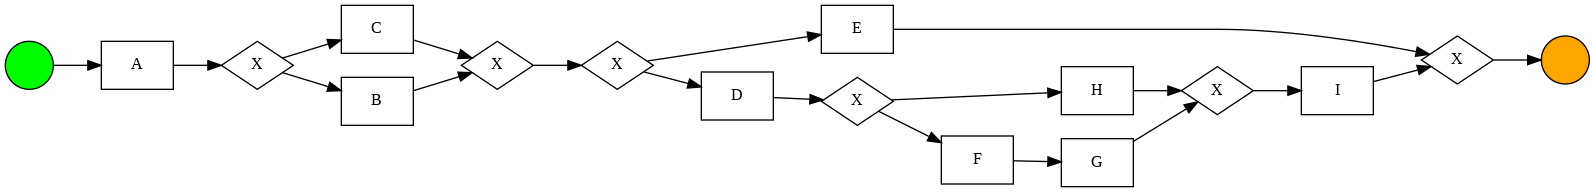

In [ ]:
# Discover the process map from the generated event log. It is identical to the initial process

bpmn_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(bpmn_model)

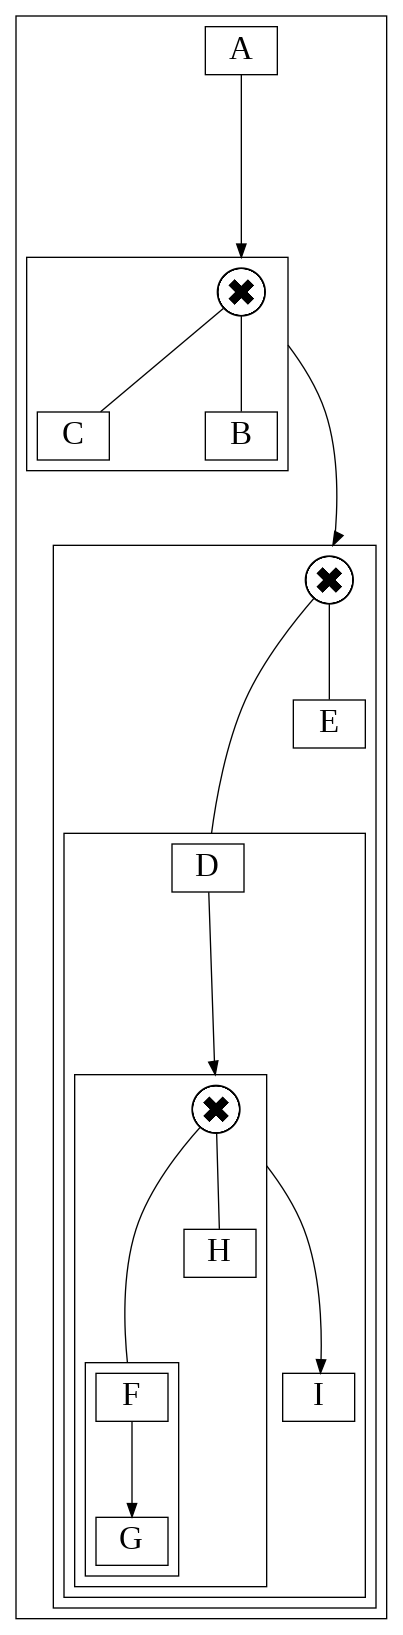

In [ ]:
# Discovering the partial orders of the process
powl = pm4py.discovery.discover_powl(event_log)
pm4py.view_powl(powl)

In [ ]:
# Partial order set
print(powl)

PO(nodes = {  A, X( 'C', 'B' ), X( PO(nodes = {  D, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), I  }, order = {  D-->X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), D-->I, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' )-->I  }), 'E' )  }, order = {  A-->X( 'C', 'B' ), A-->X( PO(nodes = {  D, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), I  }, order = {  D-->X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), D-->I, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' )-->I  }), 'E' ), X( 'C', 'B' )-->X( PO(nodes = {  D, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), I  }, order = {  D-->X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' ), D-->I, X( PO(nodes = {  F, G  }, order = {  F-->G  }), 'H' )-->I  }), 'E' )  })
